**school** - аббервиатура школы  
**sex** - пол ученика (F - жен., М - муж.)  
**age** - возраст ученика (от 15 до 22)  
**address** - тип адреса ученика (U - городской, R - за городом)  
**famsize** - размер семьи (LE3 <= 3, GE3 >3)  
**Pstatus** - статус совместного жилья родителей (T - живут вместе, А - раздельно)  
**Medu** - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
**Fedu** - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
**Mjob** - работа матери (teacher - учитель, health - сфера здравоохранения, services -гос. служба, at_home - не работает, other - другое)  
**Fjob** - работа отца (teacher - учитель, health - сфера здравоохранения, services -гос. служба, at_home - не работает, other - другое)  
**reason** - причина выбора школы (home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое)  
**guardian** - опекун (mother - мать, father - отец, other - другое)  
**traveltime** - время пути до школы (1 - < 15 мин., 2 - 15-30, 3 - 30- 60, 4 - >60)  
**studytime** - время на учёбу помимо школы в неделю (1 - < 2 часов, 2 - 2-5, 3 - 5-10, 4 - >10)  
**failures** - кол-во внеучебных неудач (n, если 1<=n<=3, иначе 0)  
**schoolsup** - дополнительная образовательная поддержка (yes или no)  
**famsup** - семейная образовательная поддержка (yes или no)  
**paid** - дополнительные платные занятия по математике (yes или no)  
**activities** - дополнительные внеучебные занятия (yes или no)  
**nursery** - посещал детский сад или нет (yes или no)  
**higher** - хочет получить высшее образование (yes или no)  
**internet** - наличие интернета дома (yes или no)  
**romantic** - в романтических отношениях (yes или no)  
**famrel** - семейные отношения (от 1 - очень плохо до 5 - очень хорошо)  
**freetime** - свободное время после школы (от 1 - очень мало до 5 - очень много)  
**goout** - проведение времени с друзьями (от 1 - очень мало до 5 - очень много)  
**health** - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)  
**absences** - количество пропущенных занятий  
**score** - баллы по госэкзамену по математике  
Задача - отследить влияние условий жизни учащихся на их успеваемость по математике, чтобы выявить студентов группы риска.  
Провести разведывательный анализ и составить отчёт по результатам.  
Рекомендации по выполнению проекта:  
1. Провести первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.  
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.  
3. Оцените количество уникальных значений для номинативных переменных.  
4. По необходимости, преобразуйте данные.  
5. Проведите корреляционный анализ количественных переменных.  
6. Отберите не кореллирующие переменные.  
7. Проанализируйте номинативные переменные и устраните те, которые не которые не влияют на предсказываемую величину (в нашем случае на переменную score).  
8. Сформулировать выводы относительно качества данных и тех переменных, которые мы будем использовать в дальнейшем построении модели.

Установка кнопки проверки PEP8

In [1]:
#conda install -c conda-forge jupyter_contrib_nbextensions

In [2]:
#pip install autopep8

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns # для красивостей в графиках

stud1 = pd.read_csv('stud_math.csv')
stud = stud1.copy()

In [4]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Находим процент отсутствующих значений по колонкам.

In [5]:
((stud.isnull() | stud.isna()).sum() * 100 / stud.index.size).round(2)

school                  0.00
sex                     0.00
age                     0.00
address                 4.30
famsize                 6.84
Pstatus                11.39
Medu                    0.76
Fedu                    6.08
Mjob                    4.81
Fjob                    9.11
reason                  4.30
guardian                7.85
traveltime              7.09
studytime               1.77
failures                5.57
schoolsup               2.28
famsup                  9.87
paid                   10.13
activities              3.54
nursery                 4.05
studytime, granular     1.77
higher                  5.06
internet                8.61
romantic                7.85
famrel                  6.84
freetime                2.78
goout                   2.03
health                  3.80
absences                3.04
score                   1.52
dtype: float64

In [6]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [7]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Т.к. в описании колонки snudytime максимальное число в ячейке может быть чило 4, а в колонке studytime, granular содержатся отрицательные числа - максимальное из них  
-3 и минимальное -12 - мы не знаем, что отражает данная колонка. Соответственно исключаем её.

In [8]:
stud.drop(['studytime, granular'], inplace = True, axis = 1) # исключаем колонку studytime, granular

Т.к. все колонки содержат данные об условиях жизни, которые могут оказать влияние на успеваемость по математике, и,  
судя по малому проценту отсутствующих значений (максимальный в колонке Pstatus равен 11.39),  
напишем функцию замены данных на наиболее часто встречающиеся в каждой колонке.

In [9]:
# составим функцию для вывода начальных данных
def test(df, colx):
    dfx = df[colx]
    a1 = pd.DataFrame(dfx.value_counts())
    a1['percent'] = round((a1[colx] * 100 / len(df)), 2)
    b1 = round((100 - a1.percent.sum()), 2)
    display(a1), print(f'Процент незаполненных значений: {b1}'), df.loc[:, [colx]].info()
# составим функцию для обработки данных
def objekt(df, colx): # функция для замены отсутствующих значений на наиболле часто встречающиеся
    dfx = df[colx]
    if dfx.dtypes == 'O':
    # заполнение строковых столбцов: когда строковые столбцы имеют пропущенные значения и значения NaN
        dfx.fillna(dfx.mode().values[0], inplace = True)
    else:
    # заполнение числовых столбцов: когда числовые столбцы имеют пропущенные значения и значения NaN
        dfx.fillna(dfx.value_counts().index[0], inplace = True)
    a = pd.DataFrame(dfx.value_counts())
    a['percent'] = round((a[colx] * 100 / len(df)), 2)
    return a
def q1(listt): # первый квартиль
    # listt - столбик df или список значений
    q1 = listt.quantile(0.25, interpolation = 'midpoint')
    return q1
def q3(listt): # третий квартиль
     # listt - столбик df или список значений
    q3 = listt.quantile(0.75, interpolation = 'midpoint')
    return q3
def iqr(listt): # межквартильный размах(IQR)
     # listt - столбик df или список значений
    i = q3(listt) - q1(listt)
    return i
def whiskers1(listt): # нижний (мин.) ус
     # listt - столбик df или список значений
    w1 = q1(listt) - 1.5*iqr(listt)
    return w1
def whiskers3(listt): # верхний (макс.) ус
     # listt - столбик df или список значений
    w3 = q3(listt) + 1.5*iqr(listt)
    return w3
def eject1(listt): # нижние выбросы
     # listt - столбик df или список значений
    miin = []
    for x in listt:
        if x <= whiskers1(listt):
            miin.append(x)
    return miin
def eject3(listt): # верхние выбросы
     # listt - столбик df или список значений
    maax = []
    for x in listt:
        if x >= whiskers3(listt):
            maax.append(x)
    return maax

In [10]:
stud.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [11]:
# изучим данные school (school - аббервиатура школы)
test(stud, 'school')

,school,percent
GP,349,88.35
MS,46,11.65


Процент незаполненных значений: 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Все данные в колонке заполнены, данные распределены так, что мы не можем исключить какие- либо строки. Соответственно оставляем её без изменений.

In [12]:
# изучим данные sex (sex - пол ученика (F - жен., М - муж.))
test(stud, 'sex')

,sex,percent
F,208,52.66
M,187,47.34


Процент незаполненных значений: 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Все данные в колонке заполнены, данные распределены так, что мы не можем исключить какие- либо строки. Соответственно оставляем её без изменений.

,age,percent
16,104,26.33
17,98,24.81
15,82,20.76
18,82,20.76
19,24,6.08
20,3,0.76
21,1,0.25
22,1,0.25


Процент незаполненных значений: 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


<AxesSubplot:>

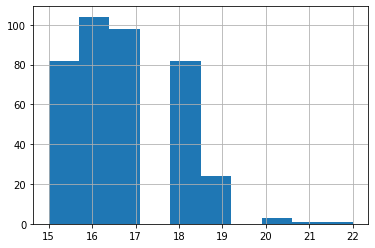

In [13]:
# Изучим данные age (age - возраст ученика (от 15 до 22))
# Столбец age числовой и без пропусков. Построим его распределение.
test(stud, 'age')
stud.age.hist()

У этого признака распределение без аномалий, выбросов нет.  
Все данные в колонке заполнены, данные включают весь необходимый нам интервал 15-22 года. Соответственно оставляем её без изменений.

In [14]:
# изучим данные address (address - тип адреса ученика (U - городской, R - за городом))
test(stud, 'address')

,address,percent
U,295,74.68
R,83,21.01


Процент незаполненных значений: 4.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 5%, поэтому заполняем отсутствующие значения наиболее часто встречающимся.

In [15]:
objekt(stud, 'address')

,address,percent
U,312,78.99
R,83,21.01


In [16]:
# изучим данные famsize (famsize - размер семьи (LE3 <= 3, GE3 >3))
test(stud, 'famsize')

,famsize,percent
GT3,261,66.08
LE3,107,27.09


Процент незаполненных значений: 6.83
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 7%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [17]:
# Заменим None на GT3
objekt(stud, 'famsize')

,famsize,percent
GT3,288,72.91
LE3,107,27.09


In [18]:
# изучим данные Pstatus (Pstatus - статус совместного жилья родителей (T - живут вместе, А - раздельно))
test(stud, 'Pstatus')

,Pstatus,percent
T,314,79.49
A,36,9.11


Процент незаполненных значений: 11.4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Т.к. данные распределены так, что их большая часть ~ 80% имеет значение T, заполним отсутствующие значения наиболее часто встречающимся.

In [19]:
objekt(stud, 'Pstatus')

,Pstatus,percent
T,359,90.89
A,36,9.11


,Medu,percent
4.0,131,33.16
2.0,102,25.82
3.0,97,24.56
1.0,59,14.94
0.0,3,0.76


Процент незаполненных значений: 0.76
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


<AxesSubplot:>

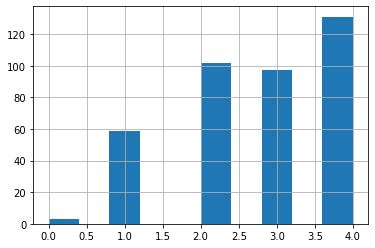

In [20]:
# Изучим данные Medu (Medu - образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее))
# Столбец Medu числовой и c малым количеством пропусков. Построим его распределение.
test(stud, 'Medu')
stud.Medu.hist()

У этого признака распределение без аномалий, выбросов нет. Заполняем отсутствующие значения средними.

In [21]:
objekt(stud, 'Medu')

,Medu,percent
4.0,134,33.92
2.0,102,25.82
3.0,97,24.56
1.0,59,14.94
0.0,3,0.76


,Fedu,percent
2.0,106,26.84
3.0,96,24.30
4.0,88,22.28
1.0,78,19.75
0.0,2,0.51
40.0,1,0.25


Процент незаполненных значений: 6.07
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


<AxesSubplot:>

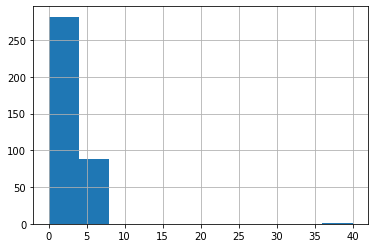

In [22]:
# изучим данные Fedu (Fedu - образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее))
# Столбец Fedu числовой и c малым количеством пропусков. Построим его распределение.
test(stud, 'Fedu')
stud.Fedu.hist()

Колонка содержит один выброс с неизвестным значением. Заменим его наиболее часто встречающимся.

In [23]:
stud.Fedu.replace(eject3(stud.Fedu)[0], inplace = True)

In [24]:
objekt(stud, 'Fedu')

,Fedu,percent
2.0,130,32.91
3.0,96,24.30
4.0,89,22.53
1.0,78,19.75
0.0,2,0.51


In [25]:
# изучим данные Mjob (Mjob - работа матери (teacher - учитель, health - сфера здравоохранения, services -гос. служба, at_home - не работает, other - другое))
test(stud, 'Mjob')

,Mjob,percent
other,133,33.67
services,98,24.81
at_home,58,14.68
teacher,55,13.92
health,32,8.10


Процент незаполненных значений: 4.82
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 5%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [26]:
objekt(stud, 'Mjob')

,Mjob,percent
other,152,38.48
services,98,24.81
at_home,58,14.68
teacher,55,13.92
health,32,8.10


In [27]:
# изучим данные Fjob (Fjob - работа отца (teacher - учитель, health - сфера здравоохранения, services -гос. служба, at_home - не работает, other - другое))
test(stud, 'Fjob')

,Fjob,percent
other,197,49.87
services,102,25.82
teacher,29,7.34
at_home,16,4.05
health,15,3.80


Процент незаполненных значений: 9.12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 10%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [28]:
objekt(stud, 'Fjob')

,Fjob,percent
other,233,58.99
services,102,25.82
teacher,29,7.34
at_home,16,4.05
health,15,3.80


In [29]:
# изучим данные reason (reason - причина выбора школы (home - близость к дому, reputation - репутация школы, course - образовательная программа, other - другое))
test(stud, 'reason')

,reason,percent
course,137,34.68
home,104,26.33
reputation,103,26.08
other,34,8.61


Процент незаполненных значений: 4.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 5%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [30]:
objekt(stud, 'reason')

,reason,percent
course,154,38.99
home,104,26.33
reputation,103,26.08
other,34,8.61


In [31]:
# изучим данные guardian (guardian - опекун (mother - мать, father - отец, other - другое))
test(stud, 'guardian')

,guardian,percent
mother,250,63.29
father,86,21.77
other,28,7.09


Процент незаполненных значений: 7.85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 10%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [32]:
objekt(stud, 'guardian')

,guardian,percent
mother,281,71.14
father,86,21.77
other,28,7.09


,traveltime,percent
1.0,242,61.27
2.0,96,24.30
3.0,22,5.57
4.0,7,1.77


Процент незаполненных значений: 7.09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


<AxesSubplot:>

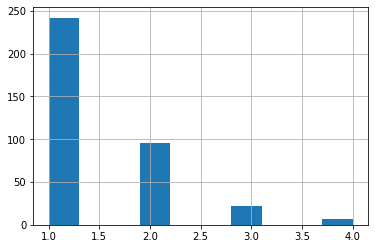

In [33]:
# изучим данные traveltime (traveltime - время пути до школы (1 - < 15 мин., 2 - 15-30, 3 - 30- 60, 4 - >60))
test(stud, 'traveltime')
stud.traveltime.hist()

У этого признака распределение без аномалий, выбросов нет. Заполняем отсутствующие значения средними.

In [34]:
objekt(stud, 'traveltime')

,traveltime,percent
1.0,270,68.35
2.0,96,24.30
3.0,22,5.57
4.0,7,1.77


,studytime,percent
2.0,194,49.11
1.0,103,26.08
3.0,64,16.20
4.0,27,6.84


Процент незаполненных значений: 1.77
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


<AxesSubplot:>

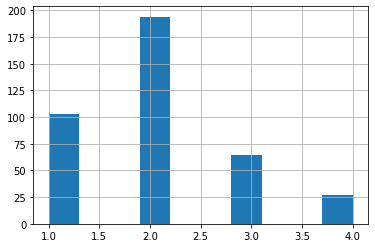

In [37]:
# изучим данные studytime (studytime - время на учёбу помимо школы в неделю (1 - < 2 часов, 2 - 2-5, 3 - 5-10, 4 - >10))
test(stud, 'studytime')
stud.studytime.hist()

У этого признака распределение без аномалий, выбросов нет. Заполняем отсутствующие значения средними.

In [38]:
objekt(stud, 'studytime')

,studytime,percent
2.0,201,50.89
1.0,103,26.08
3.0,64,16.20
4.0,27,6.84


,failures,percent
0.0,293,74.18
1.0,49,12.41
2.0,16,4.05
3.0,15,3.80


Процент незаполненных значений: 5.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


<AxesSubplot:>

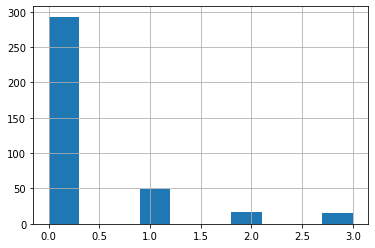

In [39]:
# изучим данные failures (failures - кол-во внеучебных неудач (n, если 1<=n<=3, иначе 0))
test(stud, 'failures')
stud.failures.hist()

У этого признака распределение без аномалий, выбросов нет. Заполняем отсутствующие значения средними.

In [40]:
objekt(stud, 'failures')

,failures,percent
0.0,315,79.75
1.0,49,12.41
2.0,16,4.05
3.0,15,3.80


In [42]:
# изучим данные schoolsup (schoolsup - дополнительная образовательная поддержка (yes или no))
test(stud, 'schoolsup')

,schoolsup,percent
no,335,84.81
yes,51,12.91


Процент незаполненных значений: 2.28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 5%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [43]:
objekt(stud, 'schoolsup')

,schoolsup,percent
no,344,87.09
yes,51,12.91


In [44]:
# изучим данные famsup (famsup - семейная образовательная поддержка (yes или no))
test(stud, 'famsup')

,famsup,percent
yes,219,55.44
no,137,34.68


Процент незаполненных значений: 9.88
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 10%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [45]:
objekt(stud, 'famsup')

,famsup,percent
yes,258,65.32
no,137,34.68


In [46]:
# изучим данные paid (paid - дополнительные платные занятия по математике (yes или no))
test(stud, 'paid')

,paid,percent
no,200,50.63
yes,155,39.24


Процент незаполненных значений: 10.13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 11%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [47]:
objekt(stud, 'paid')

,paid,percent
no,240,60.76
yes,155,39.24


In [48]:
# изучим данные activities (activities - дополнительные внеучебные занятия (yes или no))
test(stud, 'activities')

,activities,percent
yes,195,49.37
no,186,47.09


Процент незаполненных значений: 3.54
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 5%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [49]:
objekt(stud, 'activities')

,activities,percent
yes,209,52.91
no,186,47.09


In [50]:
# изучим данные nursery (nursery - посещал детский сад или нет (yes или no))
test(stud, 'nursery')

,nursery,percent
yes,300,75.95
no,79,20.00


Процент незаполненных значений: 4.05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 5%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [51]:
objekt(stud, 'nursery')

,nursery,percent
yes,316,80.0
no,79,20.0


In [52]:
# изучим данные higher (higher - хочет получить высшее образование (yes или no))
test(stud, 'higher')

,higher,percent
yes,356,90.13
no,19,4.81


Процент незаполненных значений: 5.06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 6%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [53]:
objekt(stud, 'higher')

,higher,percent
yes,376,95.19
no,19,4.81


In [54]:
# изучим данные internet (internet - наличие интернета дома (yes или no))
test(stud, 'internet')

,internet,percent
yes,305,77.22
no,56,14.18


Процент незаполненных значений: 8.6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 10%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [55]:
objekt(stud, 'internet')

,internet,percent
yes,339,85.82
no,56,14.18


In [56]:
# изучим данные romantic (romantic - в романтических отношениях (yes или no))
test(stud, 'romantic')

,romantic,percent
no,240,60.76
yes,124,31.39


Процент незаполненных значений: 7.85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Не все данные в колонке заполнены, но их меньше 10%, поэтому заполним отсутствующие значения наиболее часто встречающимся.

In [58]:
objekt(stud, 'romantic')

,romantic,percent
no,271,68.61
yes,124,31.39


,famrel,percent
4.0,182,46.08
5.0,99,25.06
3.0,62,15.70
2.0,17,4.30
1.0,7,1.77
-1.0,1,0.25


Процент незаполненных значений: 6.84
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


<AxesSubplot:>

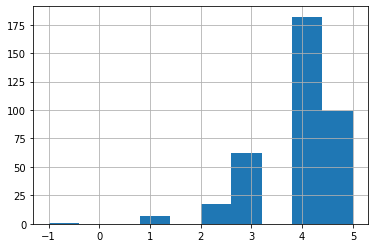

In [60]:
# изучим данные famrel (famrel - семейные отношения (от 1 - очень плохо до 5 - очень хорошо))
test(stud, 'famrel')
stud.famrel.hist()

In [35]:
#sns.pairplot(stud, kind = 'reg')

In [36]:
#correlation = stud.corr() # вычислим коэффициенты корреляции м/д количественными признаками
#sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

freetime - свободное время после школы (от 1 - очень мало до 5 - очень много)
goout - проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
health - текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
absences - количество пропущенных занятий
score - баллы по госэкзамену по математике